# Bagging

In [ ]:
#@title Create Data
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html  

In [ ]:
print("Contoh 5 baris pertama dari X (fitur):")
display(X[:5])

print("\nContoh 5 baris pertama dari y (label):")
display(y[:5])

Contoh 5 baris pertama dari X (fitur):


array([[ 0.83103915, -0.25874875],
       [ 1.18506381,  0.92038714],
       [ 1.16402213, -0.45552558],
       [-0.0236556 ,  1.08628844],
       [ 0.48050273,  1.50942444]])


Contoh 5 baris pertama dari y (label):


array([1, 0, 1, 0, 0])

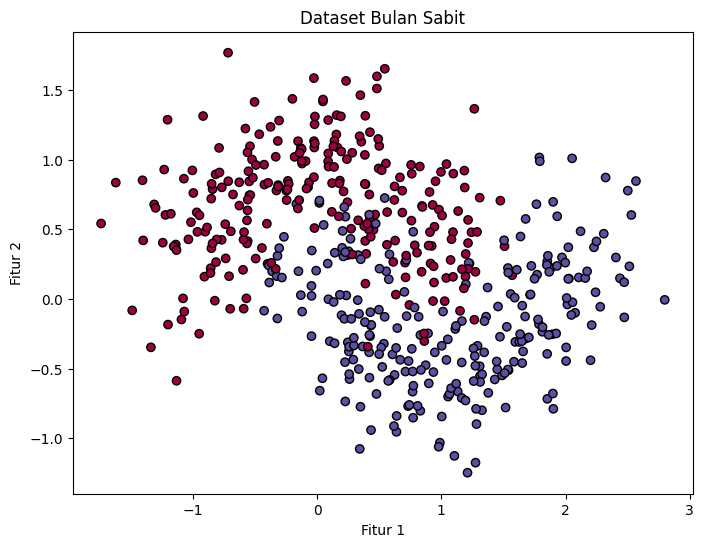

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
plt.title('Dataset Bulan Sabit')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()

Membuat data buatan berbentuk bulan sabit, menambahkan sedikit kebisingan (noise) ke dalamnya, lalu membagi data tersebut menjadi data untuk melatih model dan data untuk menguji model. Ini adalah langkah awal dalam mempersiapkan data untuk melatih dan mengevaluasi model machine learning.

## DT VS DT with Bagging 🌳

In [ ]:
#@title Create and Train Bagging Model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

Kode ini menyiapkan dan melatih model Bagging yang terdiri dari 500 Decision Tree, di mana setiap Decision Tree dilatih pada subset acak dari 100 sampel data pelatihan.

In [ ]:
#@title Function to visualize classifier
def plot_decision_boundary(clf, X, y, alpha=1.0):
  axes=[-1.5, 2.4, -1, 1.5]
  x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)

  plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
  plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
  colors = ["#78785c", "#c47b27"]
  markers = ("o", "^")
  for idx in (0, 1):
    plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
             color=colors[idx], marker=markers[idx], linestyle="none")
  plt.axis(axes)
  plt.xlabel(r"$x_1$")
  plt.ylabel(r"$x_2$", rotation=0)


Fungsi ini berfungsi untuk memvisualisasikan cara model klasifikasi membagi ruang data (fitur) untuk membedakan antar kelas. Ini membantu kita melihat dan memahami bagaimana model membuat keputusan prediksi, dengan menampilkan batas-batas pemisah (decision boundary) yang dipelajari oleh model.

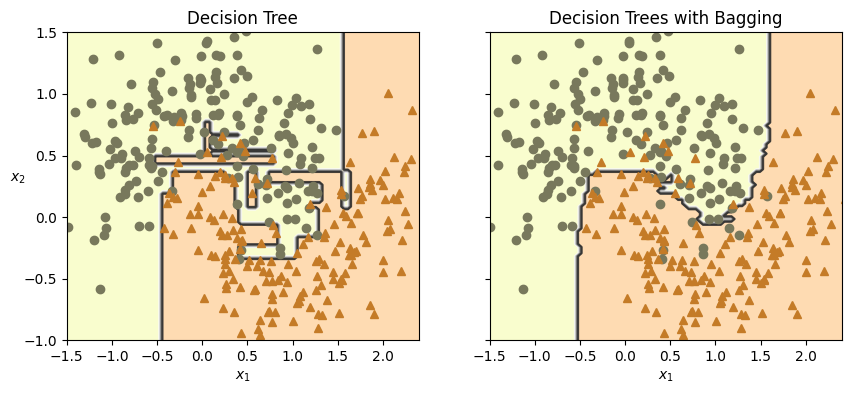

In [ ]:
#@title Create DT Classifier and Compare it with Bagging
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")

plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")

plt.ylabel("")
plt.show()


Visualisasi yang memungkinkan perbandingan langsung antara seberapa "halus" atau kompleks batas keputusan yang dipelajari oleh Decision Tree tunggal (yang cenderung **overfitting**) dan batas keputusan yang dipelajari oleh Bagging Classifier (yang cenderung lebih mulus dan robust).

Dari Gambar terlihat Decission Tree berusaha terlalu keras untuk memisahkan setiap titik dengan sempurna. Perhatikan bagaimana model membuat "pulau-pulau" kecil atau lekukan tajam hanya untuk menangkap satu atau dua titik data. Sehingga terjadi **High Variance** (Varian Tinggi) atau OVERFITTING.

Sedangkan DT with Bagging, Model gabungan ini mengabaikan "noise" dan titik-titik data aneh. model memplejari pola umum yang memisahkan data lingkaran dan data segitiga.Sehingga bagging telah berhasil mengurangi Variance.

In [ ]:
#@title Accuracy Comparisson between DT and Bagging
score_tree = tree_clf.score(X_test, y_test)
score_bag = bag_clf.score(X_test, y_test)

print(f"Decision Tree Classifier Accuracy: {score_tree:.3f}")
print(f"Decision Trees with Bagging Classifier Accuracy: {score_bag:.3f}")

Decision Tree Classifier Accuracy: 0.856
Decision Trees with Bagging Classifier Accuracy: 0.904


Dari hasil perhitungan akurasi pun metode DT with Bagging juga lebih baik dibandingkan dengan DT biasa.

## DT with Bagging VS Random Forest 🌲🌲🌲

In [ ]:
#@title Create and Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

Membangun dan melatih sebuah model Random Forest Classifier.
Bagian penting dari kode ini adalah hyperparameter yang digunakan saat membuat objek RandomForestClassifier:

* n_estimators=500: Ini menentukan jumlah pohon yang akan dibuat dalam "hutan". Semakin banyak pohon, umumnya kinerja model semakin baik, tetapi juga meningkatkan waktu komputasi.
* max_leaf_nodes=16: Hyperparameter ini membatasi pertumbuhan setiap pohon individu dengan membatasi jumlah node daun maksimum. Ini adalah cara untuk mengontrol kompleksitas setiap pohon dan membantu mencegah overfitting.
* n_jobs=-1: Parameter ini menginstruksikan Scikit-learn untuk menggunakan semua inti prosesor yang tersedia untuk melatih pohon secara paralel, yang mempercepat proses pelatihan.
* random_state=42: Memastikan bahwa proses pembuatan pohon (termasuk pemilihan fitur dan data acak) dapat direproduksi, sehingga hasilnya konsisten setiap kali kode dijalankan.

In [ ]:
#@title Create and Training DT with Bagging Model
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_features='sqrt',
                                                   max_leaf_nodes=16),
                  n_estimators=500, n_jobs=-1, random_state=42)

Mengatur hyperparameter pada base estimator-nya (Decision Tree) agar lebih mirip dengan konfigurasi pohon pada Random Forest yang sebelumnya dibuat.
* max_features="sqrt": Saat membangun setiap pohon, hanya sebagian fitur (akar kuadrat dari total jumlah fitur) yang dipertimbangkan untuk pemisahan pada setiap node. Ini memperkenalkan keacakan tambahan, mirip dengan Random Forest. Di setiap node Decision Tree (saat model sedang mencari cara terbaik untuk membagi data di node tersebut), alih-alih mempertimbangkan semua fitur yang ada, model hanya akan memilih subset acak dari fitur-fitur tersebut.
Jumlah fitur dalam subset acak ini adalah akar kuadrat (sqrt) dari total jumlah fitur yang ada dalam dataset.
* max_leaf_nodes=16: Membatasi jumlah node daun maksimum pada setiap pohon individual menjadi 16. Ini mengontrol kedalaman pohon dan membantu mencegah overfitting.
* n_estimators=500: Jumlah Decision Tree yang akan dilatih dalam ensemble (sama seperti sebelumnya).
* n_jobs=-1: Menggunakan semua core CPU untuk pelatihan paralel.
random_state=42: Menentukan seed untuk pengacakan.

In [ ]:
#@title Function to visualize classifier
def plot_decision_boundary(clf,X,y,alpha=1.0):
  axes=[-1.5,2.4,-1,1.5]
  x1,x2=np.meshgrid(np.linspace(axes[0],axes[1],100),
                    np.linspace(axes[2],axes[3],100))
  X_new=np.c_[x1.ravel(),x2.ravel()]
  y_pred=clf.predict(X_new).reshape(x1.shape)
  plt.contourf(x1,x2,y_pred,alpha=0.3*alpha,cmap='Wistia')
  plt.contour(x1,x2,y_pred,cmap="Greys",alpha=0.8*alpha)
  colors=["#78785c","#c47b27"]
  markers=("o","^")
  for idx in (0,1):
    plt.plot(X[:,0][y==idx],X[:,1][y==idx],
             color=colors[idx],marker=markers[idx],linestyle="none")
  plt.axis(axes)
  plt.xlabel(r"$x_1$")
  plt.ylabel(r"$x_2$",rotation=0)

Fungsi ini berfungsi untuk memvisualisasikan cara model klasifikasi membagi ruang data (fitur) untuk membedakan antar kelas. Ini membantu kita melihat dan memahami bagaimana model membuat keputusan prediksi, dengan menampilkan batas-batas pemisah (decision boundary) yang dipelajari oleh model.

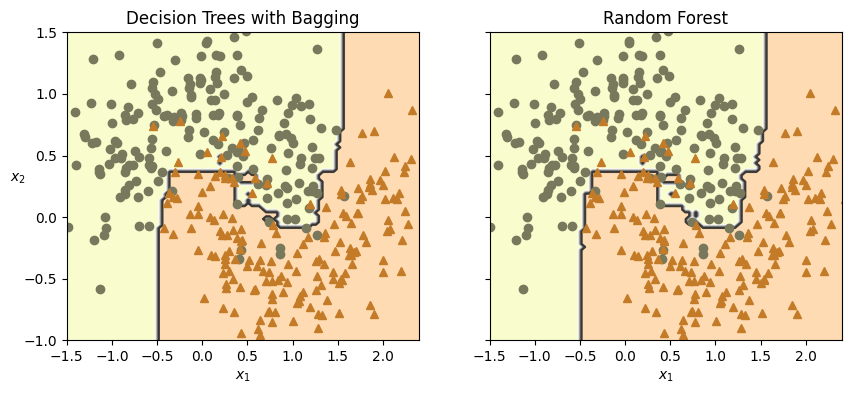

In [ ]:
#@title Compare DT with Bagging and Random Forest

fig,axes=plt.subplots(ncols=2,figsize=(10,4),sharey=True)

plt.sca(axes[0])
plot_decision_boundary(bag_clf,X_train,y_train)
plt.title("Decision Trees with Bagging")

plt.sca(axes[1])
plot_decision_boundary(rnd_clf,X_train,y_train)
plt.title("Random Forest")

plt.ylabel("")
plt.show()

Membandingkan antara DT with Bagging dengan Random Forest yang hasilnya hampir sama saja.
Karena Random Forest PADA DASARNYA ADALAH Bagging.

* Bagging (plot kiri) adalah metode umum. MOdel mengambil algoritma dasar (seperti Decision Tree), melatihnya berkali-kali pada bootstrap sample (data acak baris), lalu mengambil voting.

* Random Forest (plot kanan) adalah implementasi spesifik dari Bagging. Ia melakukan semua yang dilakukan Bagging, TAPI dengan satu tambahan "keacakan":

  * Saat setiap pohon sedang dibangun, di setiap titik percabangan, ia tidak diizinkan melihat semua fitur (kolom) data.

  * Dipaksa untuk memilih fitur terbaik hanya dari subset acak fitur (kolom).

  Nah, keacakan pada pengambilan fitur yang ada pada Bagging agar mirip seperti RF yaitu dengan tambahan hyperparameter `max_features="sqrt"`



In [ ]:
#@title Accuracy Comparison between DT with Bagging and Random Forest
score_bag=bag_clf.score(X_test,y_test)
score_rnd=rnd_clf.score(X_test,y_test)

print(f"Decision Tree Classifier Accuracy:{score_bag:.3f}")
print(f"Decision Trees with Bagging Classifier Accuracy:{score_rnd:.3f}")

Decision Tree Classifier Accuracy:0.912
Decision Trees with Bagging Classifier Accuracy:0.912


Akurasinya pun sama

## **Kesimpulan Bagging**
Metode ensemble learning seperti Bagging dan Random Forest secara efektif dapat meningkatkan kinerja model contohnya Decision Tree dengan mengurangi varians dan overfitting, menghasilkan batas keputusan yang lebih robust dan akurasi yang lebih tinggi pada data yang tidak terlihat (data pengujian).

# Boosting ⏫

In [ ]:
#@title Create and Train AdaBoost Classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
 	DecisionTreeClassifier(max_depth=1), n_estimators=30,
 	learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

Hyperparameter pada model:

* **max_depth=1** -> Ini adalah Decision Stump yang merupakan weak learner.

* **n_estimators=30** -> jumlah weak learner (hipotesis) yang akan dibuat.

* **learning_rate=0.5** -> Learning rate adalah parameter yang menyusutkan kontribusi dari setiap weak learner (menyusutkan nilai $\alpha$ atau $a$). Ini adalah teknik regularisasi untuk mencegah overfitting.

* **random_state=42**-> setiap kali kode dijalankan, hasil "keacakan" (jika ada, seperti dalam pemilihan fitur atau data) akan selalu sama.



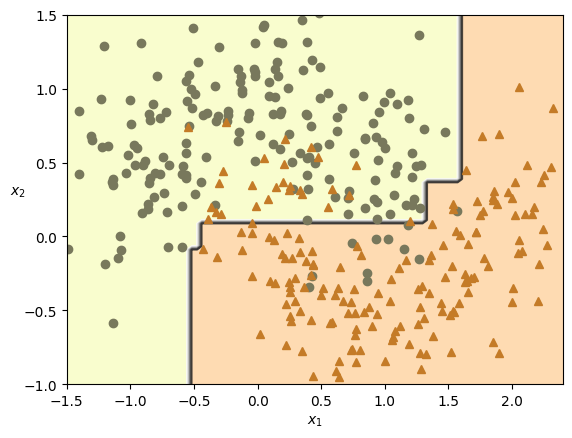

In [ ]:
#@title Visualize Plot decission AdaBoost
plot_decision_boundary(ada_clf, X_train, y_train)

Setiap Decision Stump ($h_1, h_2, h_3, ...$) yang kita latih hanyalah satu garis lurus—entah vertikal atau horizontal.

Plot dari ensemble gabungan ($H_{final}$), yang merupakan penjumlahan berbobot dari 30 Decision Stump sederhana.

Gambar hasil plot decission lebih smooth dibanding dengan Random Forest dikarena jumlah n_estimator jauh berbedanya

In [ ]:
#@title AdaBoost Accuracy Score
score_ada = ada_clf.score(X_test, y_test)
print(f"ADABoost Classifier Accuracy: {score_ada:.3f}")

ADABoost Classifier Accuracy: 0.880


.score -> Mengembalikan (nilai) akurasi pada data dan label yang diberikan.

nilai akurasi adaboost lebih kecil dari Random Forest

## **Kesimpulan Boosting**
Berdasarkan percobaan menggunakan AdaBoost Classifier pada dataset bulan sabit:

*   **Performa:** Model AdaBoost mencapai akurasi 0.0.88 pada data pengujian.
*   **Batas Keputusan:** Visualisasi batas keputusan menunjukkan bahwa AdaBoost menghasilkan batas yang lebih halus dibandingkan dengan Decision Tree tunggal, Random Forest, menunjukkan kemampuannya untuk mengurangi varians.
*   **Perbandingan dengan Random Forest:** Akurasi AdaBoost (0.88) lebih kecil dibanding dengan Random Forest (0.912) pada kasus ini, dimana ada perbedaan hyperparameter terutama di n_estimators nya
*   **Weak Learner:** Penggunaan Decision Stump (Decision Tree dengan `max_depth=1`) sebagai *weak learner* menunjukkan bahwa bahkan dengan model dasar yang sederhana, Boosting dapat membangun model ensemble yang sangat baik.

AdaBoost dapat meningkatkan performa model dengan menggabungkan *weak learner* secara sekuensial, memberikan bobot lebih pada sampel yang sulit diklasifikasikan.

# Stacking 🥪

In [ ]:
#@title Create and Train Stacking Classifier

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
stacking_clf = StackingClassifier(
 estimators=[
 	('lr', LogisticRegression(random_state=42)),
 	('rf', RandomForestClassifier(random_state=42)),
 	('svc', SVC(probability=True, random_state=42))
 ],
 final_estimator=RandomForestClassifier(random_state=43),
 cv=5 # number of cross-validation folds
)
stacking_clf.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

* estimators=[ ... ] (Para "Pakar" / Level-0)-> parameter yang mendefinisikan "tim pakar" atau model-model Level-0
  * ('lr', LogisticRegression(...)): Pakar 1 adalah model linear.

  * ('rf', RandomForestClassifier(...)): Pakar 2 adalah model ensemble (Bagging).

  * ('svc', SVC(...)): Pakar 3 adalah model boundary (Support Vector Machine). SVC **(probability=True)** diperlukan agar SVC dapat mengeluarkan probabilitas, sehingga input untuk model Level-1 menjadi konsisten (semua berupa probabilitas).

* final_estimator=RandomForestClassifier(...) (Si "Manajer" / Level-1)-> Meta-Model atau model Level-1. Belajar dari prediksi yang dihasilkan oleh ketiga estimators (pakar) tadi.

* cv=5 -> Cross-Validation: membagi data latih Anda menjadi 5 Lipatan (Folds)

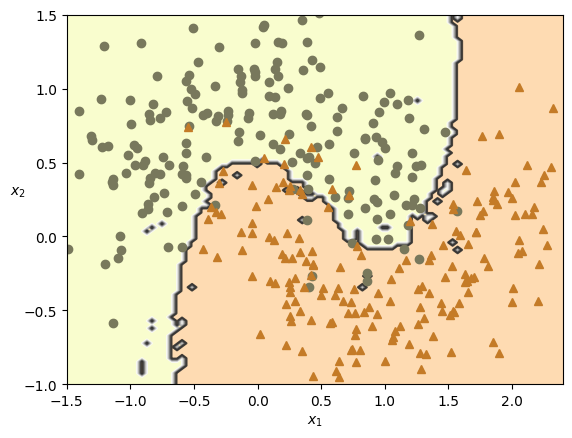

In [ ]:
#@title Visualize plot decission Stacking
plot_decision_boundary(stacking_clf, X_train, y_train)

Gambar hasil plot diatas terlihat berbeda dengan Random Forest maupun AdaBoost yang algoritma dasarnya adalah Decission Tree.

Ciri khas plot boundary Decission Tree adalah garis vertikal dan horizontal berbentuk tangga (garis lurus).

Pada gambar ini terdapat pengaruh model level - 0 yaitu: SVM (yang batasnya melengkung), Logistic Regression (batas lurus), dan Decision Tree (batas tangga).

Plot tersebut bukan gambaran dari salah satu model Level-0. Itu adalah batas pemisah akhir yang dibuat oleh Meta-Model Level-1 ("Si Manajer"), yaitu RandomForestClassifier.

In [ ]:
#@title Stacking Accuracy Score
score_stack = stacking_clf.score(X_test, y_test)
print(f"Stacking Classifier Accuracy: {score_stack:.3f}")

Stacking Classifier Accuracy: 0.928


Akurasi Stacking jauh lebih baik dibanding Random Forest dan AdaBoost. 0.912 berbanding dengan 0.928.

## **Kesimpulan Stacking**

Berdasarkan percobaan menggunakan Stacking Classifier pada dataset bulan sabit:

*   **Performa Unggul:** Model Stacking mencapai akurasi tertinggi (0.928) dibandingkan dengan Random Forest (0.912), dan AdaBoost (0.88) pada data pengujian. Hal ini menunjukkan efektivitas Stacking dalam menggabungkan kekuatan berbagai model dasar.
*   **Batas Keputusan yang Kompleks:** Visualisasi batas keputusan Stacking mencerminkan kombinasi karakteristik dari model-model Level-0 (Logistic Regression, Random Forest, dan SVC), yang kemudian diolah oleh Meta-Model (Random Forest). Ini menghasilkan batas keputusan yang lebih kompleks dan mampu menangkap pola data yang lebih rumit.
*   **Kelebihan Model:** Keberhasilan Stacking terletak pada kemampuannya untuk memanfaatkan beragam perspektif dari model-model dasar yang berbeda. Model Level-1 belajar cara terbaik untuk menggabungkan prediksi dari model-model Level-0, sehingga menghasilkan prediksi akhir yang lebih robust dan akurat.
*   **Potensi Peningkatan:** Dengan pemilihan model Level-0 dan Level-1 yang tepat, serta penyesuaian hyperparameter, kinerja Stacking dapat lebih ditingkatkan lagi.

Secara keseluruhan, percobaan ini menunjukkan bahwa Stacking adalah teknik ensemble yang mampu untuk meningkatkan performa model klasifikasi, terutama pada dataset yang kompleks, dengan menggabungkan prediksi dari berbagai model dasar menggunakan meta-model.